In [2]:
def load_image(path, mode = 0):
    import cv2
    
    img = cv2.imread(path, mode)
    print("Original Image shape:", img.shape)
    return img

def downsample(img):
    # Convert from uint8 representation with values between 0 and 255 to
    # a floating point representation with values between 0 and 1.
    img = img / 255.
    
    # original_img = img.copy()

    # downsample for higher speed
    img = img[::4, ::4] + img[1::4, ::4] + img[::4, 1::4] + img[1::4, 1::4]
    print("Image shape after downsampling", img.shape)
    img /= 4.0
    return img

def patchify(img, shape):
    from sklearn.feature_extraction.image import extract_patches_2d

    patches = extract_patches_2d(img, shape)
    # print("patches.shape", patches.shape)
    return patches    

def depatchify(patches, shape):
    from sklearn.feature_extraction.image import reconstruct_from_patches_2d
    
    reconstructed_img = reconstruct_from_patches_2d(patches, shape)
    return reconstructed_img

def plot_patches(patches):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(30, 30))
    for i, patch in enumerate(patches[:100]):
        plt.subplot(10, 10, i + 1)
        plt.imshow(patch, cmap=plt.cm.gray,
                   interpolation='nearest')
    
def plot_side_by_side(img1, img2):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)

    plt.imshow(img1, vmin=0, vmax=1, cmap=plt.cm.gray,
               interpolation='nearest')


    plt.subplot(1, 2, 2)

    plt.imshow(img2, vmin=0, vmax=1, cmap=plt.cm.gray,
               interpolation='nearest')

    plt.show()
    
# img = load_image("../input/beeflowr.ppm")
# img = downsample(img)
# patches = patchify(img, (64, 64))
# reconstructed_image = depatchify(patches, (128, 128))
# plot_patches(patches)
# plot_side_by_side(img, reconstructed_image)

In [3]:
def load_data(train_path="../input/imageinpainting/images/images/train/*", test_path="../input/imageinpainting/images/images/test/*"):
    import glob
    import numpy as np
    filelist_train = glob.glob(train_path)
    filelist_test = glob.glob(test_path)

    import cv2
    x_train = np.array([np.array(cv2.imread(fname, 0)) for fname in filelist_train])
    x_test = np.array([np.array(cv2.imread(fname, 0)) for fname in filelist_test])
    return x_train, x_test

In [4]:
# A dataset of 62 training and 4 test images of 512x512 dimension
x_train, x_test = load_data()
x_train.shape, x_test.shape

((62, 512, 512), (4, 512, 512))

In [6]:
def downsample_3d(img):
    # Convert from uint8 representation with values between 0 and 255 to
    # a floating point representation with values between 0 and 1.
    img = img / 255.
    
    # original_img = img.copy()

    # downsample for higher speed
    img = img[:,::4, ::4] + img[:,1::4, ::4] + img[:,::4, 1::4] + img[:,1::4, 1::4]
    print("Image shape after downsampling", img.shape)
    img /= 4.0
    return img

x_train = downsample_3d(x_train)
x_test = downsample_3d(x_test)
n, h, w = x_train.shape # n = #of image samples
n, h, w

Image shape after downsampling (62, 128, 128)
Image shape after downsampling (4, 128, 128)


(62, 128, 128)

In [15]:
# TODO: vectorize patchify https://stackoverflow.com/a/48709806
def patchify_v(images, shape):
    import numpy as np
    # By default it creats numpy array of dtype=float64 which will lead to Memory Error
    # float32 is a temporary solution and works sometimes
    # FIXME: find a way to prevent memory error
    res=np.array([patchify(img, shape) for img in images], dtype="float32")
    return res

# choosing patch size of 64x64 we are able to recreate original image
# larger patch size gives poor reconstructed image quality
# smaller patch size gives out of memory error
patches = patchify_v(x_train, (64, 64))
# n_samples x n_patches x h x w
patches.shape

(62, 4225, 64, 64)

In [ ]:
## A failed attempt at vectorization
# import numpy as np
# patchify_v = np.vectorize(patchify)
# patches = patchify_v(x_train, (64, 64))
# patches.shape

In [16]:
def depatchify_v(patches, shape):
    import numpy as np
    
    res = []
    for img_patches in patches:
        res.append(depatchify(img_patches, shape))
    return np.array(res)

reconstructed_images = depatchify_v(patches, (h, w))
reconstructed_images.shape

(62, 128, 128)

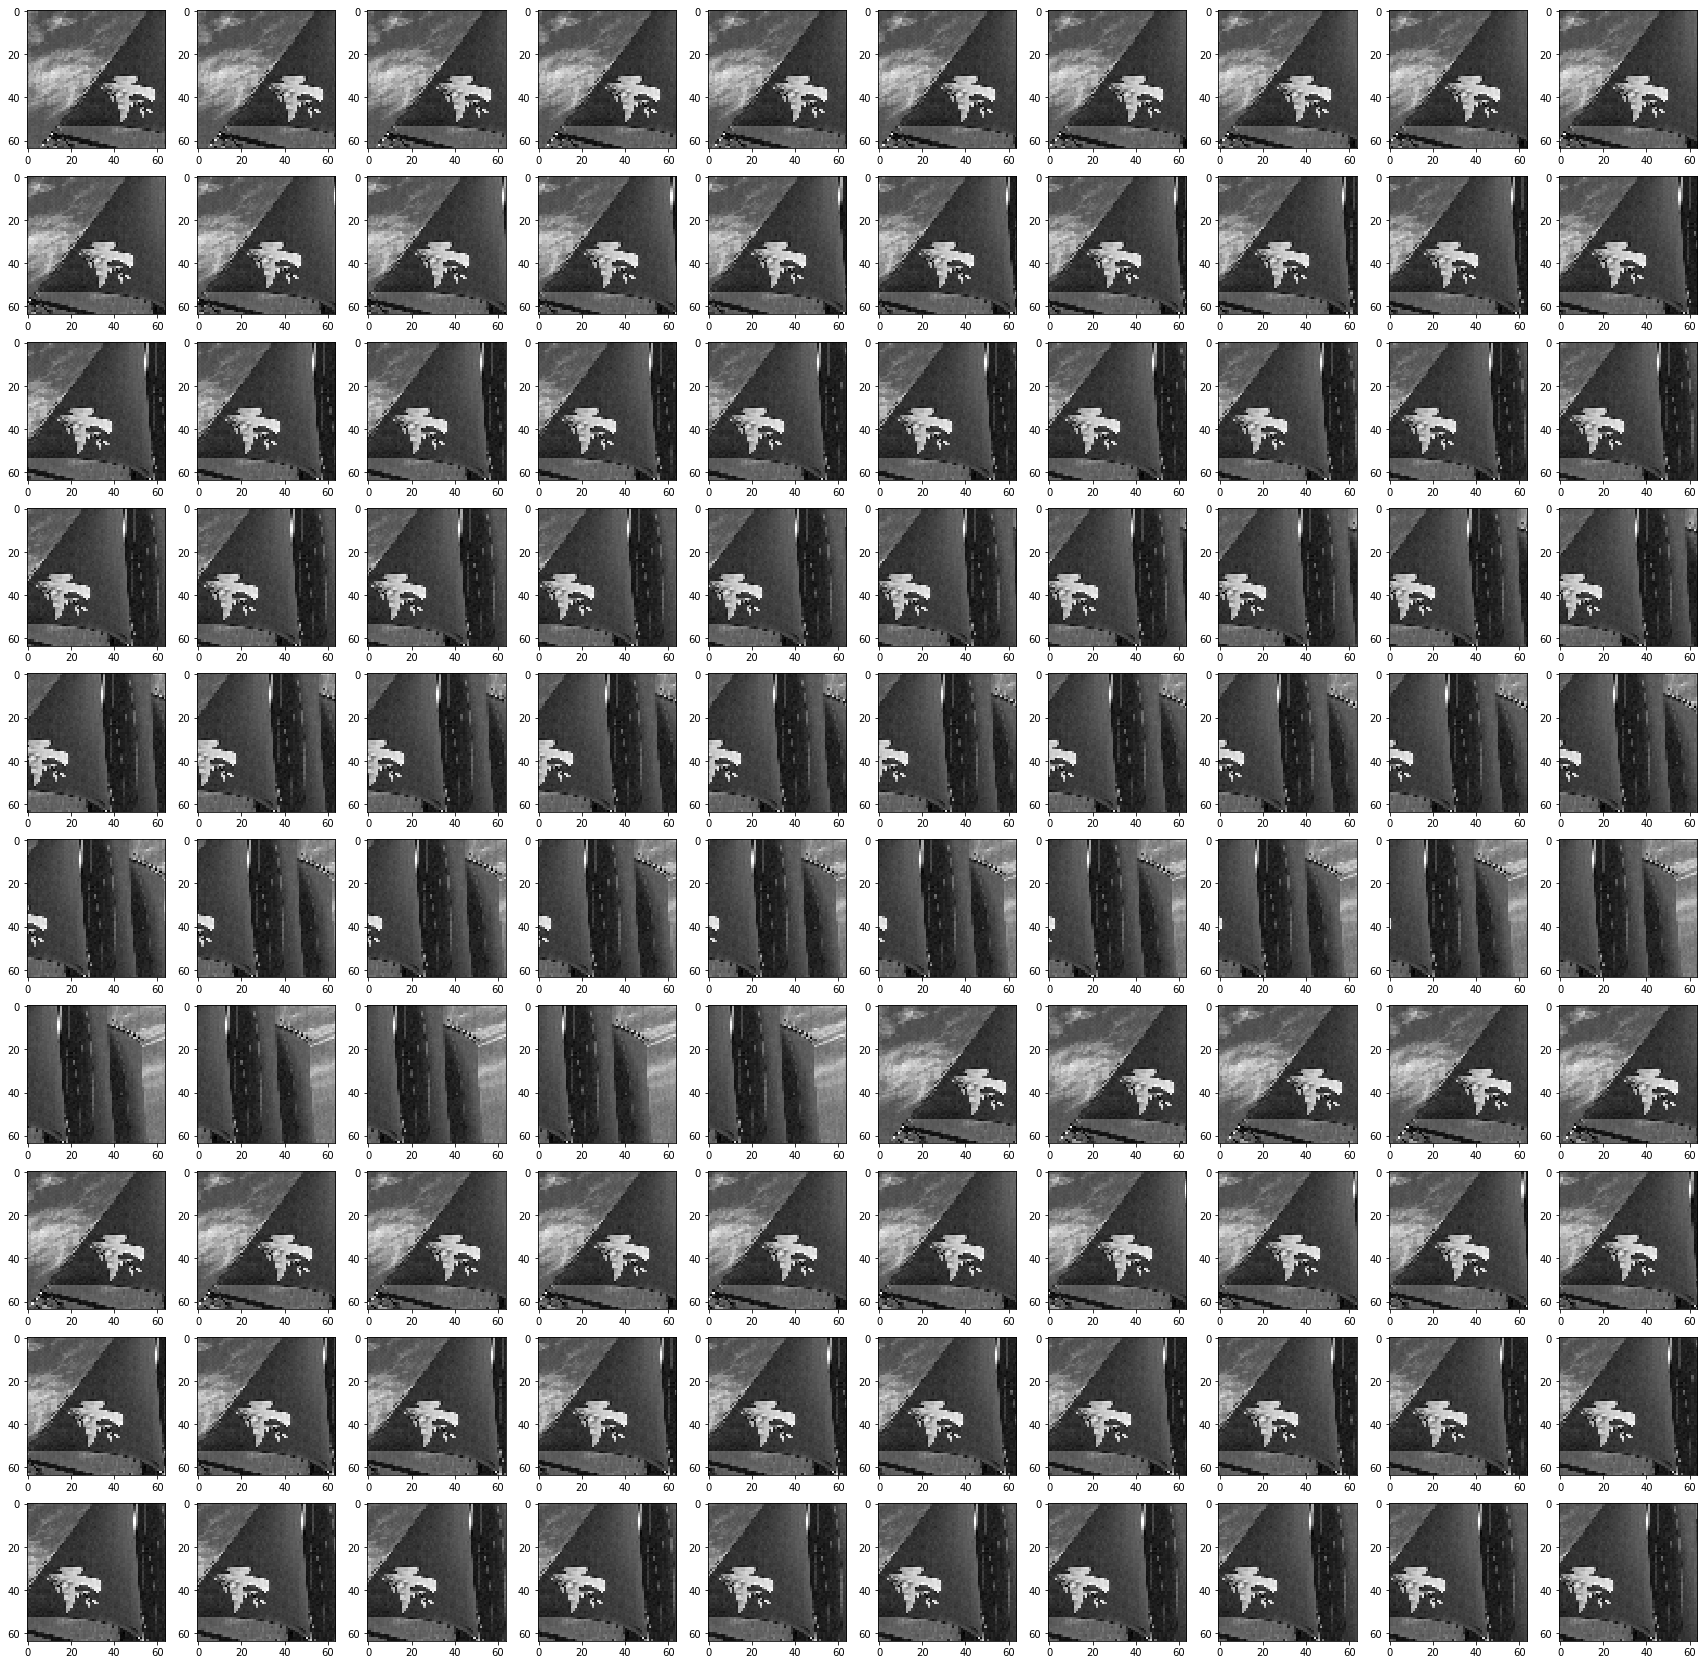

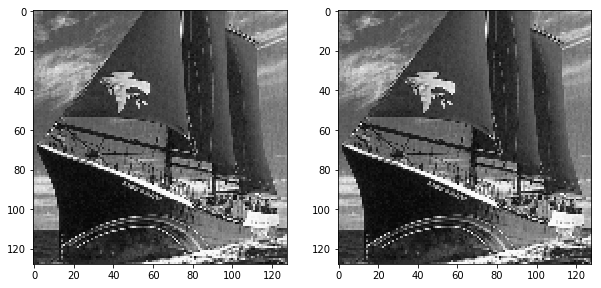

In [17]:
patches.shape
plot_patches(patches[0])
plot_side_by_side(x_train[0], reconstructed_images[0])

In [ ]:
# img = load_image("../input/imageinpainting/images/images/train/grnpeace.ppm")
# img = downsample(img)
# patches = patchify(img, (64, 64))
# print("patches.shape:", patches.shape)
# print("patches.dtype:", patches.dtype)
# print("type(patches).:", type(patches))
# reconstructed_image = depatchify(patches, (128, 128))
# plot_patches(patches)
# plot_side_by_side(img, reconstructed_image)